In [26]:
import pandas as pd
import numpy as np

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv('train.csv')

In [89]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [91]:
gen_sub = pd.read_csv('gender_submission.csv')

In [92]:
gen_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [93]:
gen_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [94]:
df = df.drop(columns= ["Ticket", 'Cabin', 'Embarked', 'Name'])


In [95]:
df = df.fillna(-1)

In [96]:
corrmap = df[['Pclass', 'Age','SibSp', 'Parch', 'Fare',]].corr()

<Axes: >

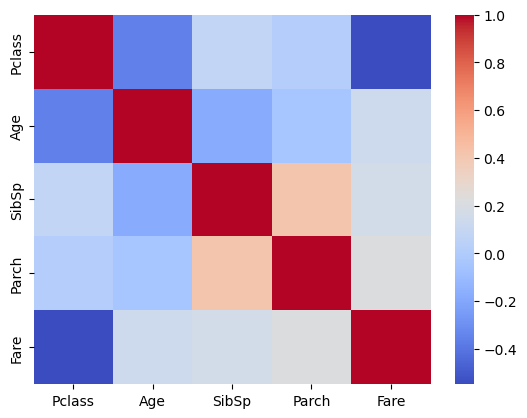

In [97]:
sns.heatmap(corrmap, cmap = 'coolwarm')

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
tree = DecisionTreeClassifier()

In [100]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [101]:
df.Sex = df.Sex.map({'male':1, 'female':0})

In [102]:
x_train = df[['Pclass', 'Sex','Age','SibSp', 'Parch', 'Fare']]
y_train = df.Survived

In [103]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [104]:
test = pd.read_csv('test.csv')

In [105]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [106]:
test = test.drop(columns= ["Ticket", 'Cabin', 'Embarked', 'Name']).fillna(-1)

In [107]:
test.Sex = test.Sex.map({'male':1, 'female':0})

In [108]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.5,0,0,7.8292
1,893,3,0,47.0,1,0,7.0000
2,894,2,1,62.0,0,0,9.6875
3,895,3,1,27.0,0,0,8.6625
4,896,3,0,22.0,1,1,12.2875


In [109]:
pred = tree.predict(test.loc[:, test.columns != 'PassengerId'])

In [110]:
gen_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [111]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [112]:
test = test.assign(prediction = pred)

In [113]:
test = test.merge(gen_sub, left_on = 'PassengerId', right_on= 'PassengerId')

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
accuracy_score(test.Survived, test.prediction)

0.7822966507177034

In [116]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,prediction,Survived
0,892,3,1,34.5,0,0,7.8292,0,0
1,893,3,0,47.0,1,0,7.0000,0,1
2,894,2,1,62.0,0,0,9.6875,1,0
3,895,3,1,27.0,0,0,8.6625,1,0
4,896,3,0,22.0,1,1,12.2875,0,1


In [117]:
p = test[['PassengerId', 'prediction']]

In [118]:
p.rename(columns = {'prediction': 'Survived'}).set_index('PassengerId').to_csv('predict.csv')

In [119]:
type(p)

pandas.core.frame.DataFrame